# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df = pd.read_csv("data/temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [185]:
# Primeras filas
df.head()



,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [186]:
# Información del dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [187]:
# Estadísticas descriptivas
df.describe()



,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [188]:
# Verificar valores nulos
df.isnull().sum()

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

In [189]:
# Eliminar la columna 'year' del DataFrame
df = df.drop('year', axis=1)  # axis=1 indica que es una columna

# Verificar que se haya eliminado
print(df.columns)

Index(['month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')


In [191]:
# Aplicar One-Hot Encoding a 'week' (convertir días en columnas binarias)
df = pd.get_dummies(df, columns=['week'], drop_first=True)

# Verificar
print("\nDataFrame después de One-Hot Encoding:\n", df.head())


DataFrame después de One-Hot Encoding:
    month  day  temp_2  temp_1  average  actual  forecast_noaa  forecast_acc  \
0      1    1      45      45     45.6      45             43            50   
1      1    2      44      45     45.7      44             41            50   
2      1    3      45      44     45.8      41             43            46   
3      1    4      44      41     45.9      40             44            48   
4      1    5      41      40     46.0      44             46            46   

   forecast_under  friend  week_Mon  week_Sat  week_Sun  week_Thurs  \
0              44      29     False     False     False       False   
1              44      61     False      True     False       False   
2              47      56     False     False      True       False   
3              46      53      True     False     False       False   
4              46      41     False     False     False       False   

   week_Tues  week_Wed  
0      False     False  
1      

#### Feature Engineering

### 3. Selecciona variables y divide en train y test

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# Separar variables predictoras y variable objetivo
X = df_encoded.drop("actual", axis=1)
y = df_encoded["actual"]

# División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


NameError: name 'df_encoded' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

# Selección de variables predictoras y objetivo
X = df.drop(columns=['actual', 'temp_1'])  # Variables predictoras
y = df['temp_1']  # Variable objetivo

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Entrena el modelo


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Seleccionar las características y la variable objetivo
X = df[['temp_2', 'average']]  # Usamos las columnas relevantes del dataset
y = df['target']  # Variable objetivo

# Crear y entrenar el modelo
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)



KeyError: 'target'

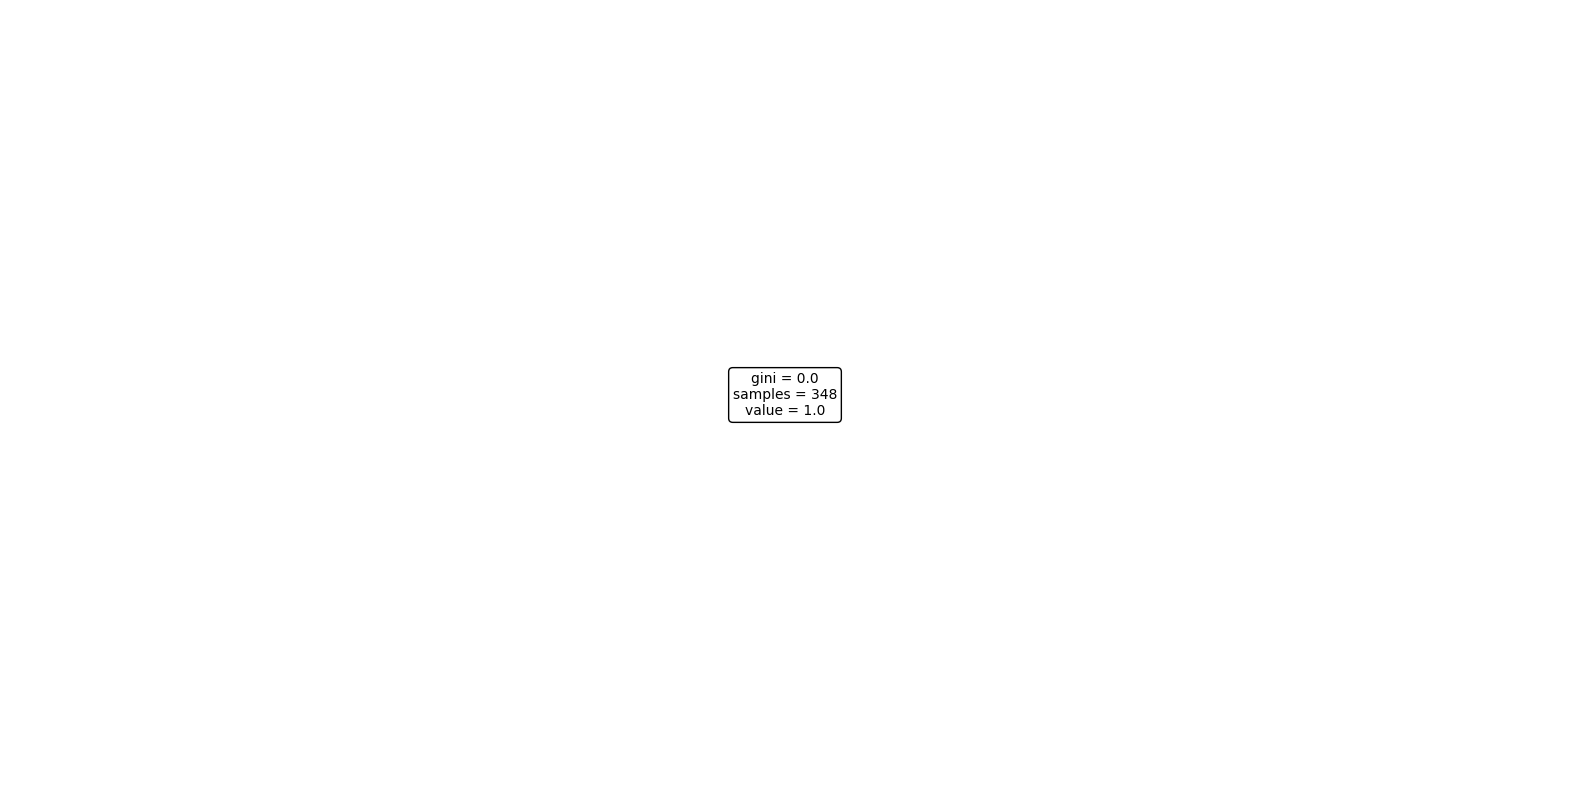

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(tree_clf,
          feature_names=X_train.columns,
          # class_names=["<=15°C", ">15°C"],  # Uncomment if it's a classification problem
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

### 5. Evaluación de tu modelo

Calcula el MAE, MAPE, MSE y RMSE.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Define and train the regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predicciones
y_pred = regressor.predict(X_test)

# Evaluaciones
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 4.89
MAPE: 7.84%
MSE: 39.89
RMSE: 6.32


### 6. Representa el árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(df
          feature_names=X_train.columns,
          #class_names=[str(c) for c in df_dt.__class__],  # Solo si es clasificación
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3354164968.py, line 4)

In [ ]:
plt.figure(figsize=(10, 10))
sklearn.tree.plot_tree(tree_clf,
                       feature_names=X_train.columns,
                       class_names=["<=15°C", ">15°C"],
                       filled=True)
plt.title("Árbol de Decisión - Clasificación")
plt.show()

NameError: name 'sklearn' is not defined

<Figure size 1000x1000 with 0 Axes>

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

### 8. Vuelve a evaluar tu modelo

### 9. Vuelve a representar su árbol

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [ ]:
model = DecisionTreeRegressor()

parameters = {
    "max_depth" : [2,3,4,5]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")

NameError: name 'DecisionTreeRegressor' is not defined

In [ ]:
y_pred = dtr_gs.best_estimator_.predict(X_test)

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

NameError: name 'dtr_gs' is not defined

In [ ]:
dtr_gs.best_params_

### 11. Obten el `feature_importances` de cada variable en el último modelo

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.